# Import modules

In [1]:
from pyvad import vad, trim
from librosa import load
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

# Speech data load

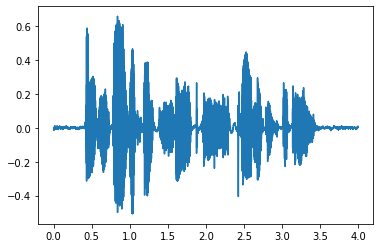

In [2]:
name = "test/voice/arctic_a0007.wav"
data, fs = load(name)
time = np.linspace(0, len(data)/fs, len(data)) # time axis
plt.plot(time, data)
plt.show()

# Do VAD (int)

In [3]:
%time vact = vad(data, fs, fs_vad = 16000, hop_length = 30, vad_mode=3)

CPU times: user 95.4 ms, sys: 3.53 ms, total: 98.9 ms
Wall time: 150 ms


# Plot result

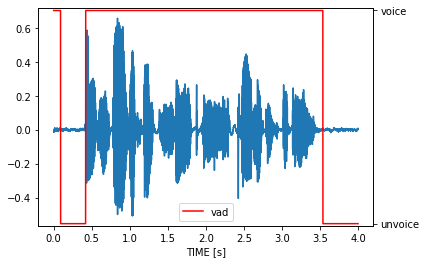

In [4]:
fig, ax1 = plt.subplots()

ax1.plot(time, data, label='speech waveform')
ax1.set_xlabel("TIME [s]")

ax2=ax1.twinx()
ax2.plot(time, vact, color="r", label = 'vad')
plt.yticks([0, 1] ,('unvoice', 'voice'))
ax2.set_ylim([-0.01, 1.01])

plt.legend()
plt.show()

# trim

In [5]:
%time trimed = trim(data, fs, fs_vad = 16000, hop_length = 30, vad_mode=3)

CPU times: user 105 ms, sys: 3.88 ms, total: 109 ms
Wall time: 145 ms


# Plot result

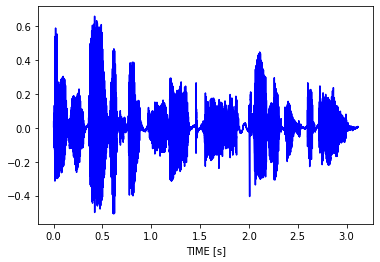

In [6]:
time = np.linspace(0, len(trimed)/fs, len(trimed)) # time axis
fig, ax1 = plt.subplots()

ax1.plot(time, trimed, color = 'b', label='speech waveform')
ax1.set_xlabel("TIME [s]")

plt.show()